# scikit-FIBERS: HLA Notebook (First FIBERS Paper Data)


***
## Imports:

In [1]:
import os
import pickle
import pandas as pd
import random
from sklearn.metrics import classification_report
from src.skfibers.fibers import FIBERS
#from src.skfibers.experiments.datagen import create_data_simulation_bin
from src.skfibers.experiments.datagen_evolvable_threshold import create_data_simulation_bin_evolve

current_working_directory = os.getcwd()
print(current_working_directory)

#Local Run Parameters
local_save = False
if local_save:
    output_folder = 'local_output'
else:
    output_folder = 'C:/Users/ryanu/Desktop/FIBERS_test_output'

c:\Users\ryanu\OneDrive\Documents\GitHub\scikit-FIBERS


***
## Load HLA Data

In [2]:
data_path = 'C:/Users/ryanu/Desktop/HLA/Imp1/Imp1.csv'
data_name = 'Imp1'
data = pd.read_csv(data_path,low_memory=False)

#Define key column names to be used in analysis
outcome_label = "graftyrs"
censor_label = "grf_fail"
amino_acids = ['A1', 'A10', 'A100', 'A101', 'A102', 'A103', 'A104', 'A105', 'A106', 'A107', 'A108', 'A109', 'A11', 'A110', 'A111', 'A112', 'A113', 'A114', 'A115', 'A116', 'A117', 'A118', 'A119', 'A12', 'A120', 'A121', 'A122', 'A123', 'A124', 'A125', 'A126', 'A127', 'A128', 'A129', 'A13', 'A130', 'A131', 'A132', 'A133', 'A134', 'A135', 'A136', 'A137', 'A138', 'A139', 'A14', 'A140', 'A141', 'A142', 'A143', 'A144', 'A145', 'A146', 'A147', 'A148', 'A149', 'A15', 'A150', 'A151', 'A152', 'A153', 'A154', 'A155', 'A156', 'A157', 'A158', 'A159', 'A16', 'A160', 'A161', 'A162', 'A163', 'A164', 'A165', 'A166', 'A167', 'A168', 'A169', 'A17', 'A170', 'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179', 'A18', 'A180', 'A181', 'A182', 'A183', 'A184', 'A185', 'A186', 'A187', 'A188', 'A189', 'A19', 'A190', 'A191', 'A192', 'A193', 'A194', 'A195', 'A196', 'A197', 'A198', 'A199', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A5', 'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A6', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74', 'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80', 'A81', 'A82', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A9', 'A90', 'A91', 'A92', 'A93', 'A94', 'A95', 'A96', 'A97', 'A98', 'A99', 'B1', 'B10', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B106', 'B107', 'B108', 'B109', 'B11', 'B110', 'B111', 'B112', 'B113', 'B114', 'B115', 'B116', 'B117', 'B118', 'B119', 'B12', 'B120', 'B121', 'B122', 'B123', 'B124', 'B125', 'B126', 'B127', 'B128', 'B129', 'B13', 'B130', 'B131', 'B132', 'B133', 'B134', 'B135', 'B136', 'B137', 'B138', 'B139', 'B14', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B162', 'B163', 'B164', 'B165', 'B166', 'B167', 'B168', 'B169', 'B17', 'B170', 'B171', 'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179', 'B18', 'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187', 'B188', 'B189', 'B19', 'B190', 'B191', 'B192', 'B193', 'B194', 'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35', 'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51', 'B52', 'B53', 'B54', 'B55', 'B56', 'B57', 'B58', 'B59', 'B6', 'B60', 'B61', 'B62', 'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B7', 'B70', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B79', 'B8', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B9', 'B90', 'B91', 'B92', 'B93', 'B94', 'B95', 'B96', 'B97', 'B98', 'B99', 'C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C133', 'C134', 'C135', 'C136', 'C137', 'C138', 'C139', 'C14', 'C140', 'C141', 'C142', 'C143', 'C144', 'C145', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C171', 'C172', 'C173', 'C174', 'C175', 'C176', 'C177', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187', 'C188', 'C189', 'C19', 'C190', 'C191', 'C192', 'C193', 'C194', 'C195', 'C196', 'C197', 'C198', 'C199', 'C2', 'C20', 'C200', 'C201', 'C202', 'C203', 'C204', 'C205', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C59', 'C6', 'C60', 'C61', 'C62', 'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C7', 'C70', 'C71', 'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C78', 'C79', 'C8', 'C80', 'C81', 'C82', 'C83', 'C84', 'C85', 'C86', 'C87', 'C88', 'C89', 'C9', 'C90', 'C91', 'C92', 'C93', 'C94', 'C95', 'C96', 'C97', 'C98', 'C99', 'DQB11', 'DQB110', 'DQB111', 'DQB112', 'DQB113', 'DQB114', 'DQB115', 'DQB116', 'DQB117', 'DQB118', 'DQB119', 'DQB12', 'DQB120', 'DQB121', 'DQB122', 'DQB123', 'DQB124', 'DQB125', 'DQB126', 'DQB127', 'DQB128', 'DQB129', 'DQB13', 'DQB130', 'DQB131', 'DQB132', 'DQB133', 'DQB134', 'DQB135', 'DQB136', 'DQB137', 'DQB138', 'DQB139', 'DQB14', 'DQB140', 'DQB141', 'DQB142', 'DQB143', 'DQB144', 'DQB145', 'DQB146', 'DQB147', 'DQB148', 'DQB149', 'DQB15', 'DQB150', 'DQB151', 'DQB152', 'DQB153', 'DQB154', 'DQB155', 'DQB156', 'DQB157', 'DQB158', 'DQB159', 'DQB16', 'DQB160', 'DQB161', 'DQB162', 'DQB163', 'DQB164', 'DQB165', 'DQB166', 'DQB167', 'DQB168', 'DQB169', 'DQB17', 'DQB170', 'DQB171', 'DQB172', 'DQB173', 'DQB174', 'DQB175', 'DQB176', 'DQB177', 'DQB178', 'DQB179', 'DQB18', 'DQB180', 'DQB181', 'DQB182', 'DQB183', 'DQB184', 'DQB185', 'DQB186', 'DQB187', 'DQB188', 'DQB189', 'DQB19', 'DQB190', 'DQB191', 'DQB192', 'DQB193', 'DQB194', 'DRB11', 'DRB110', 'DRB111', 'DRB112', 'DRB113', 'DRB114', 'DRB115', 'DRB116', 'DRB117', 'DRB118', 'DRB119', 'DRB12', 'DRB120', 'DRB121', 'DRB122', 'DRB123', 'DRB124', 'DRB125', 'DRB126', 'DRB127', 'DRB128', 'DRB129', 'DRB13', 'DRB130', 'DRB131', 'DRB132', 'DRB133', 'DRB134', 'DRB135', 'DRB136', 'DRB137', 'DRB138', 'DRB139', 'DRB14', 'DRB140', 'DRB141', 'DRB142', 'DRB143', 'DRB144', 'DRB145', 'DRB146', 'DRB147', 'DRB148', 'DRB149', 'DRB15', 'DRB150', 'DRB151', 'DRB152', 'DRB153', 'DRB154', 'DRB155', 'DRB156', 'DRB157', 'DRB158', 'DRB159', 'DRB16', 'DRB160', 'DRB161', 'DRB162', 'DRB163', 'DRB164', 'DRB165', 'DRB166', 'DRB167', 'DRB168', 'DRB169', 'DRB17', 'DRB170', 'DRB171', 'DRB172', 'DRB173', 'DRB174', 'DRB175', 'DRB176', 'DRB177', 'DRB178', 'DRB179', 'DRB18', 'DRB180', 'DRB181', 'DRB182', 'DRB183', 'DRB184', 'DRB185', 'DRB186', 'DRB187', 'DRB188', 'DRB189', 'DRB19', 'DRB190', 'DRB191', 'DRB192', 'DRB193', 'DRB194']
covariates = ['shared', 'DCD', 'DON_AGE', 'donage_slope_ge18', 'dcadcodanox', 'dcadcodcva', 'dcadcodcnst', 'dcadcodoth', 'don_cmv_negative', 
              'don_htn_0c', 'ln_don_wgt_kg_0c', 'ln_don_wgt_kg_0c_s55', 'don_ecd', 'age_ecd', 'yearslice', 'REC_AGE_AT_TX', 
              'rec_age_spline_35', 'rec_age_spline_50', 'rec_age_spline_65', 'diab_noted', 'age_diab', 'dm_can_age_spline_50', 
              'can_dgn_htn_ndm', 'can_dgn_pk_ndm', 'can_dgn_gd_ndm', 'rec_prev_ki_tx', 'rec_prev_ki_tx_dm', 'rbmi_0c', 'rbmi_miss', 
              'rbmi_gt_20', 'rbmi_DM', 'rbmi_gt_20_DM', 'ln_c_hd_m', 'ln_c_hd_0c', 'ln_c_hd_m_ptx', 'PKPRA_MS', 'PKPRA_1080', 
              'PKPRA_GE80', 'hispanic', 'CAN_RACE_BLACK', 'CAN_RACE_asian', 'CAN_RACE_WHITE', 'mm0', 'mmDR0', 'mmDR1', 'mmA0', 'mmA1', 
              'mmB0', 'mmB1', 'mmC0', 'mmC1', 'mmDQ0', 'mmDQ1']

print("Shape of Raw DataFrame:", data.shape)
missing_sum = data.isna().sum().sum()
print("Sum of raw data missing values:", missing_sum)

features = amino_acids + covariates + [outcome_label] + [censor_label]
print(str(len(features))+ " Total Columns")
print(str(len(amino_acids))+" AAs")
print(str(len(covariates))+ " Covariates")

data = data[features]
print("Shape of New DataFrame:", data.shape)
missing_sum = data.isna().sum().sum()
print("Sum of data missing values:", missing_sum)

data.head(3)
#Debugging
# Create a new DataFrame with 100 random rows
#data = data.sample(n=1000)

Shape of Raw DataFrame: (166574, 865)
Sum of raw data missing values: 268236
841 Total Columns
786 AAs
53 Covariates
Shape of New DataFrame: (166574, 841)
Sum of data missing values: 0


,A1,A10,A100,A101,A102,A103,A104,A105,A106,A107,...,mmA0,mmA1,mmB0,mmB1,mmC0,mmC1,mmDQ0,mmDQ1,graftyrs,grf_fail
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,3.233490,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,16.003176,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,17.002519,0


In [3]:
#Covariate examination
column_types_count = data.dtypes.value_counts()
print(column_types_count)
object_columns = data.columns[data.dtypes == 'object']
print(object_columns)
num_categories = data['REC_AGE_AT_TX'].unique()
print(num_categories)
data['REC_AGE_AT_TX']

int64      832
float64      8
object       1
Name: count, dtype: int64
Index(['REC_AGE_AT_TX'], dtype='object')
['35-49' '50-64' '65+' '18-34']


0         35-49
1         35-49
2         35-49
3         50-64
4           65+
          ...  
166569    50-64
166570    50-64
166571    35-49
166572      65+
166573    50-64
Name: REC_AGE_AT_TX, Length: 166574, dtype: object

In [4]:
#Process covariates as needed
cat_columns = data.select_dtypes(['object']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: pd.factorize(x)[0])   #IMPORTANT - this encoding is temporary to replicate paper analysis.  This must be fixed so that age ranges are ordinally encoded.
num_categories = data['REC_AGE_AT_TX'].unique()
print(num_categories)
data['REC_AGE_AT_TX']

[0 1 2 3]


0         0
1         0
2         0
3         1
4         2
         ..
166569    1
166570    1
166571    0
166572    2
166573    1
Name: REC_AGE_AT_TX, Length: 166574, dtype: int64

In [5]:
#Filter out rare AAs (<1%)
# Calculate the percentage of occurrences greater than 0 for each column
percentages = data.loc[:,amino_acids].apply(lambda x: (x > 0).mean())
print(percentages)
columns_to_remove = percentages[percentages < 0.01].index.tolist()
data = data.drop(columns=columns_to_remove)
data.shape

A1        0.000270
A10       0.000000
A100      0.000000
A101      0.000000
A102      0.005247
            ...   
DRB190    0.000018
DRB191    0.000018
DRB192    0.000036
DRB193    0.000036
DRB194    0.000042
Length: 786, dtype: float64


(166574, 247)

***
## Running FIBERS (Training)

In [6]:
"""
fibers = FIBERS(outcome_label="graftyrs", outcome_type="survival", iterations=50, pop_size = 50, crossover_prob=0.5, mutation_prob=0.1, 
                new_gen=1.0, elitism=0.1, min_bin_size=1, fitness_metric="log_rank", log_rank_weighting=None,
                censor_label="grf_fail", group_strata_min=0.2, group_thresh=None, min_thresh=0, max_thresh=3, int_thresh=True, thresh_evolve_prob=0.5,
                manual_bin_init=None, covariates=covariates, report=None, random_seed=None, verbose=False)

fibers = fibers.fit(data)
"""

'\nfibers = FIBERS(outcome_label="graftyrs", outcome_type="survival", iterations=50, pop_size = 50, crossover_prob=0.5, mutation_prob=0.1, \n                new_gen=1.0, elitism=0.1, min_bin_size=1, fitness_metric="log_rank", log_rank_weighting=None,\n                censor_label="grf_fail", group_strata_min=0.2, group_thresh=None, min_thresh=0, max_thresh=3, int_thresh=True, thresh_evolve_prob=0.5,\n                manual_bin_init=None, covariates=covariates, report=None, random_seed=None, verbose=False)\n\nfibers = fibers.fit(data)\n'

In [7]:
#Load Manual Bin Population to Partially initialize Bin Population
pop_path = 'C:/Users/ryanu/Desktop/HLA/Imp1/HLA_Paper_Pop_Init.csv'
pop = pd.read_csv(pop_path,low_memory=False)

In [8]:
fibers = FIBERS(outcome_label="graftyrs", outcome_type="survival", iterations=50, pop_size=100, crossover_prob=0.5, mutation_prob=0.1, 
                new_gen=1.0, elitism=0.1, min_bin_size=1, fitness_metric="residuals", log_rank_weighting=None,
                censor_label="grf_fail", group_strata_min=0.2, group_thresh=None, min_thresh=0, max_thresh=10, int_thresh=True, thresh_evolve_prob=0.0,
                manual_bin_init=pop, covariates=covariates, report=[0,20,50,80], random_seed=None, verbose=False)

fibers = fibers.fit(data)

Dropped 0 invariant feature columns.
Beginning FIBERS Fit:
                                         feature_list  group_threshold  \
0               [A17, DQB155, DQB174, DRB112, DRB114]                0   
1       [B30, DQB155, DQB175, DRB112, DRB114, DRB126]                0   
2   [DRB111, DRB114, DRB116, DRB126, DRB128, DRB13...                0   
3    [DQB177, DQB184, DRB111, DRB126, DRB137, DRB160]                0   
4    [DQB153, DQB189, DRB111, DRB126, DRB137, DRB177]                0   
..                                                ...              ...   
95                      [A80, B12, C113, C99, DQB174]                9   
96                                              [B97]               10   
97                                     [A156, DRB131]               10   
98                                        [C14, C170]               10   
99                          [A151, A156, C11, DQB189]               10   

     fitness  pre_fitness      metric        p_value

 42%|████▏     | 21/50 [35:05<48:46, 100.93s/it]  

ITERATION: 20
                                         feature_list  group_threshold  \
0   [A109, B143, DQB155, DQB174, DRB112, DRB116, D...                0   
1   [A109, A186, B143, DQB155, DQB174, DRB112, DRB...                0   
2   [A109, A186, B143, DQB146, DQB155, DQB174, DRB...                0   
3   [A109, A186, B143, DQB147, DQB155, DQB174, DRB...                0   
4   [A109, A186, B143, DQB128, DQB155, DQB174, DRB...                0   
..                                                ...              ...   
95  [A109, A186, B143, DQB138, DQB174, DRB173, DRB...                0   
96  [A186, B143, DQB145, DQB155, DRB112, DRB128, D...                0   
97  [A109, A158, A186, B143, C94, DQB146, DQB155, ...                0   
98  [A109, A186, A56, B143, B82, DQB128, DQB146, D...                0   
99                              [B103, DRB186, DRB19]                0   

     fitness  pre_fitness      metric        p_value  bin_size  \
0   1.000000   503.981223  503.

100%|██████████| 50/50 [1:23:55<00:00, 100.71s/it]

                                         feature_list  group_threshold  \
0   [A109, A186, B143, DQB155, DQB174, DRB112, DRB...                0   
1   [A109, A186, B143, DQB147, DQB155, DQB174, DRB...                0   
2   [A109, A171, A186, B143, DQB155, DQB174, DRB11...                0   
3   [A109, A186, B143, DQB146, DQB155, DQB174, DRB...                0   
4   [A109, A186, B143, DQB128, DQB155, DQB174, DRB...                0   
..                                                ...              ...   
95  [A109, A186, B143, DQB128, DQB155, DQB174, DRB...                0   
96  [A109, A186, B143, DQB146, DQB155, DQB174, DQB...                0   
97  [A109, A186, B143, DQB155, DQB174, DRB116, DRB...                0   
98  [A109, A171, A186, B143, DQB155, DQB174, DRB11...                0   
99  [A109, B143, DQB155, DQB174, DRB116, DRB173, D...                0   

     fitness  pre_fitness      metric        p_value  bin_size  \
0   1.000000   504.271198  504.271198  1.1185

***
## Top (or Individual) Bin Examination

In [9]:
bin_index = 1 # lowest index is the bin with the highest fitness (only reports the bin ranked at the top, despite possible fitness ties for top)

In [10]:
fibers.get_bin_report(bin_index)

,0
Features in Bin:,"[A109, A186, B143, DQB147, DQB155, DQB174, DRB..."
Threshold:,0
Fitness,0.97531
Pre-Fitness:,504.271198
Metric Score:,504.271198
p-value:,0.0
Bin Size:,11
Group Ratio:,0.243471
Count At/Below Threshold:,40556
Count Above Threshold:,126018


### Kaplan Meier Survival Plot (For Top Bin)

Dropped 0 invariant feature columns.
(166574, 247)


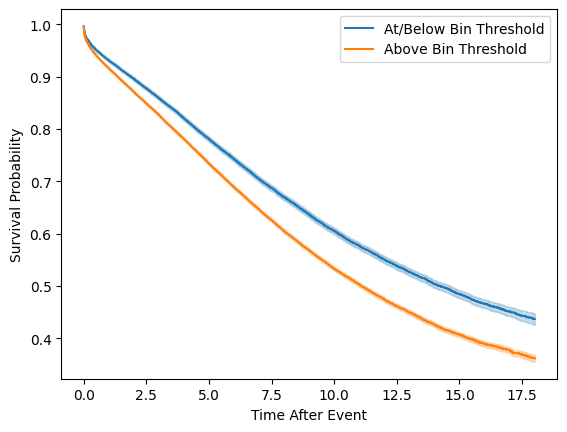

In [11]:
fibers.get_kaplan_meir(data,bin_index,save=True,output_folder=output_folder,data_name=data_name)

In [12]:
summary = fibers.get_cox_prop_hazard(data, bin_index)
bin_hr = summary['exp(coef)'].iloc[0]
bin_low_CI = summary['exp(coef) lower 95%'].iloc[0]
bin_upper_CI = summary['exp(coef) upper 95%'].iloc[0]
bin_p_val = summary['p'].iloc[0]
print("Bin HR: "+str(bin_hr)+" ("+str(bin_low_CI)+"-"+str(bin_upper_CI)+")")
print("Bin HR p-value: "+str(bin_p_val))
summary.to_csv(output_folder+'/'+'Cox_PH_'+str(bin_index)+'_'+data_name+'.csv', index=False)
summary

Dropped 0 invariant feature columns.
Iteration 1: norm_delta = 6.88e-01, step_size = 0.9500, log_lik = -674771.34752, newton_decrement = 6.47e+03, seconds_since_start = 1.0
Iteration 2: norm_delta = 1.94e-01, step_size = 0.9500, log_lik = -668537.05688, newton_decrement = 1.49e+02, seconds_since_start = 2.0
Iteration 3: norm_delta = 2.00e-02, step_size = 0.9500, log_lik = -668385.07072, newton_decrement = 1.29e+00, seconds_since_start = 3.1
Iteration 4: norm_delta = 1.31e-04, step_size = 1.0000, log_lik = -668383.77278, newton_decrement = 6.63e-05, seconds_since_start = 4.1
Iteration 5: norm_delta = 7.65e-09, step_size = 1.0000, log_lik = -668383.77272, newton_decrement = 3.04e-13, seconds_since_start = 5.1
Convergence success after 5 iterations.
Bin HR: 1.1263416208285182 (1.0979175299869217-1.1555015856479907)
Bin HR p-value: 7.291946291491716e-20


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Bin_0,0.118975,1.126342,0.013041,0.093415,0.144535,1.097918,1.155502,0.0,9.123228,7.291946e-20,63.572258
shared,0.112273,1.118818,0.010200,0.092282,0.132264,1.096674,1.141410,0.0,11.007374,3.521185e-28,91.197926
DCD,0.077996,1.081118,0.014360,0.049851,0.106141,1.051114,1.111978,0.0,5.431506,5.588057e-08,24.093078
DON_AGE,-0.010767,0.989291,0.004817,-0.020208,-0.001327,0.979995,0.998674,0.0,-2.235384,2.539217e-02,5.299473
donage_slope_ge18,0.020431,1.020641,0.004955,0.010719,0.030143,1.010777,1.030602,0.0,4.123252,3.735602e-05,14.708300
dcadcodanox,0.043601,1.044566,0.012457,0.019185,0.068018,1.019370,1.070384,0.0,3.500012,4.652370e-04,11.069747
dcadcodcva,0.068175,1.070553,0.010874,0.046862,0.089488,1.047978,1.093614,0.0,6.269469,3.622815e-10,31.362170
dcadcodcnst,-0.002759,0.997245,0.051354,-0.103410,0.097893,0.901757,1.102844,0.0,-0.053717,9.571607e-01,0.063167
dcadcodoth,0.059256,1.061047,0.027604,0.005152,0.113360,1.005166,1.120035,0.0,2.146609,3.182442e-02,4.973722


### Check and View Top Bin Ties

In [13]:
fibers.report_ties()


Only one top performing bin found


***
## Bin Population Examination
### Bin Population Pareto Front

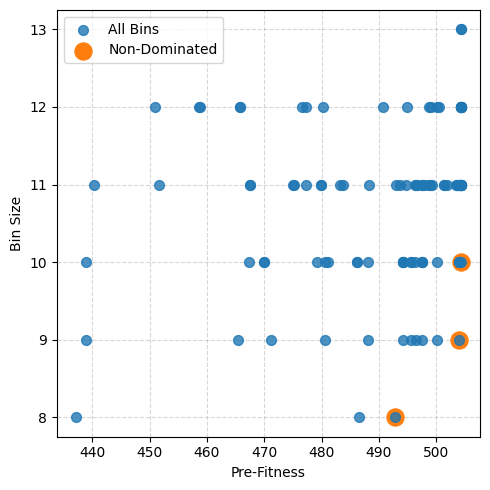

In [14]:
fibers.get_pareto_plot(save=True,output_folder=output_folder,data_name=data_name)

### Examine Feature Tracking Scores

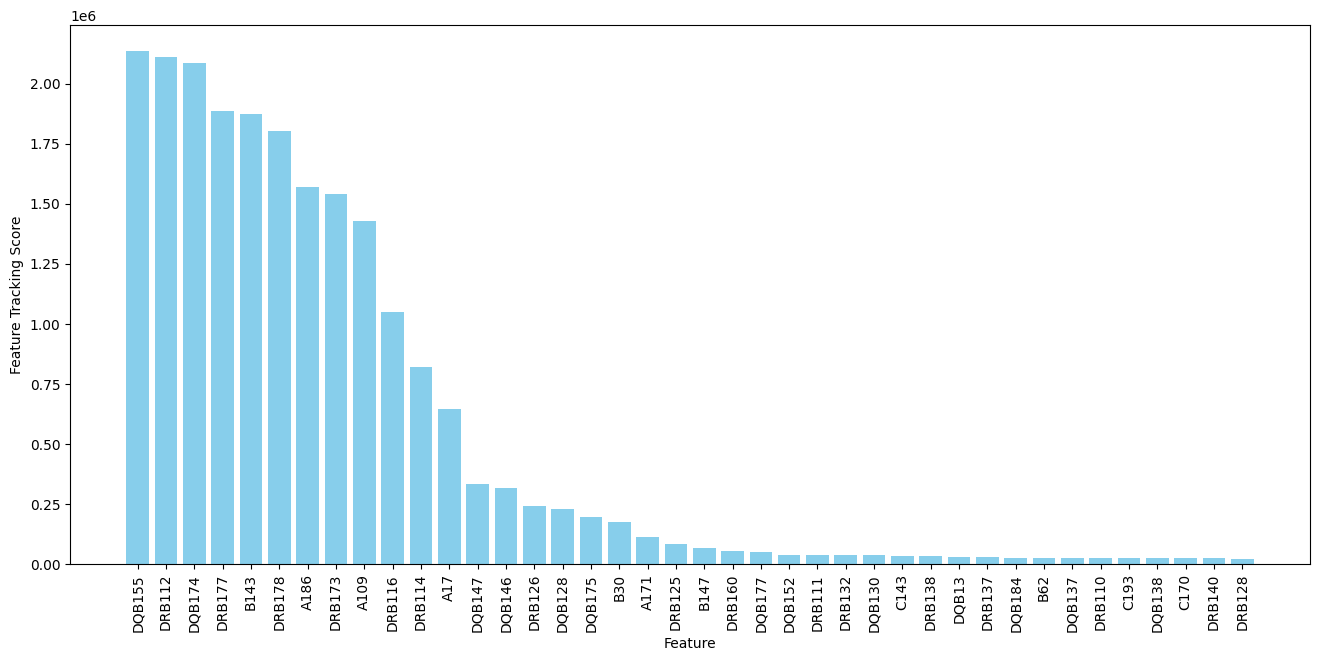

In [15]:
fibers.get_feature_tracking_plot(max_features=40,save=True,output_folder=output_folder,data_name=data_name)

### Visualize Residuals (if applied)

In [16]:
fibers.get_residuals_histogram(save=True,output_folder=output_folder,data_name=data_name)

Error: No residuals available to plot


###  Evaluate all bins with Cox PH Model

In [17]:
fibers.calculate_cox_prop_hazards(data)

Dropped 0 invariant feature columns.
Iteration 1: norm_delta = 8.94e-02, step_size = 0.9500, log_lik = -674771.34752, newton_decrement = 2.52e+02, seconds_since_start = 1.2
Iteration 2: norm_delta = 9.32e-03, step_size = 0.9500, log_lik = -674512.78761, newton_decrement = 2.48e+00, seconds_since_start = 2.5
Iteration 3: norm_delta = 5.21e-04, step_size = 0.9500, log_lik = -674510.30395, newton_decrement = 7.66e-03, seconds_since_start = 3.7
Iteration 4: norm_delta = 1.72e-07, step_size = 1.0000, log_lik = -674510.29629, newton_decrement = 8.35e-10, seconds_since_start = 4.9
Convergence success after 4 iterations.
Iteration 1: norm_delta = 6.88e-01, step_size = 0.9500, log_lik = -674771.34752, newton_decrement = 6.47e+03, seconds_since_start = 1.0
Iteration 2: norm_delta = 1.94e-01, step_size = 0.9500, log_lik = -668537.05688, newton_decrement = 1.49e+02, seconds_since_start = 2.0
Iteration 3: norm_delta = 2.00e-02, step_size = 0.9500, log_lik = -668385.07072, newton_decrement = 1.29e+0

In [18]:
fibers.get_log_rank_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

Error: No residuals available to plot


In [19]:
fibers.get_adj_HR_residuals_plot(save=True,output_folder=output_folder,data_name=data_name)

Error: No residuals available to plot


***
## History of Bin Evolution (Top Bin Each Generation)
### Plot: Fitness of top bin each training iteration

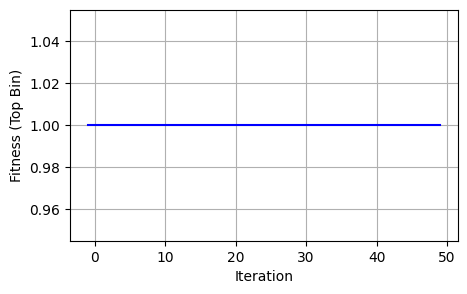

In [20]:
fibers.get_fitness_progress_plot()

### Plot: Scoring Metric and Pre-Fitness of top bin each training iteration

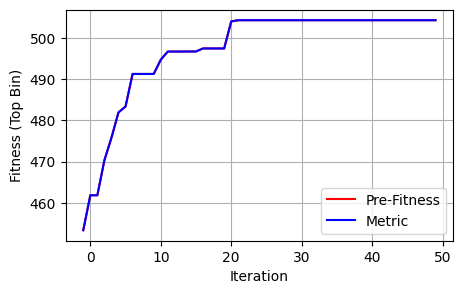

In [21]:
fibers.get_perform_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Plot: Normalized Top-Bin Stats Across Training Iterations

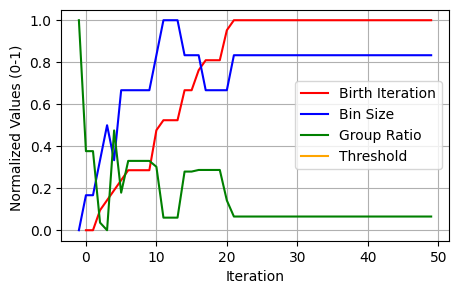

In [22]:
fibers.get_misc_progress_plot(save=True,output_folder=output_folder,data_name=data_name)

### Raw Top Bin / Generation Details

In [23]:
fibers.perform_track_df

,Iteration,Top Bin,Threshold,Fitness,Pre-Fitness,Metric,p-value,Bin Size,Group Ratio,Count At/Below Threshold,Count Below Threshold,Birth Iteration,Residuals Score,Residuals p-value,Elapsed Time
0,-1,"[A17, DQB155, DQB174, DRB112, DRB114]",0,1.0,453.347184,453.347184,1.347975e-100,5,0.291936,48629,117945,NaN,None,None,98.076268
1,0,"[A17, DQB155, DQB174, DRB112, DRB114, DRB126]",0,1.0,461.820418,461.820418,1.930806e-102,6,0.259614,43245,123329,0.0,None,None,196.976276
2,1,"[A17, DQB155, DQB174, DRB112, DRB114, DRB126]",0,1.0,461.820418,461.820418,1.930806e-102,6,0.259614,43245,123329,0.0,None,None,296.326056
3,2,"[A17, DQB155, DQB174, DRB112, DRB114, DRB126, ...",0,1.0,470.313094,470.313094,2.739285e-104,7,0.241971,40306,126268,2.0,None,None,395.642000
4,3,"[A17, B143, DQB155, DQB174, DRB112, DRB114, DR...",0,1.0,475.771582,475.771582,1.777650e-105,8,0.240091,39993,126581,3.0,None,None,495.766803
5,4,"[A17, B143, DQB155, DQB174, DRB112, DRB114, DR...",0,1.0,481.921595,481.921595,8.158505e-107,7,0.264729,44097,122477,4.0,None,None,595.777575
6,5,"[A17, B143, B30, DQB155, DQB174, DRB112, DRB11...",0,1.0,483.344702,483.344702,3.998980e-107,9,0.249367,41538,125036,5.0,None,None,695.416975
7,6,"[A17, B143, DQB155, DQB174, DRB112, DRB114, DR...",0,1.0,491.239788,491.239788,7.656832e-109,9,0.257207,42844,123730,6.0,None,None,794.800777
8,7,"[A17, B143, DQB155, DQB174, DRB112, DRB114, DR...",0,1.0,491.239788,491.239788,7.656832e-109,9,0.257207,42844,123730,6.0,None,None,895.495036
9,8,"[A17, B143, DQB155, DQB174, DRB112, DRB114, DR...",0,1.0,491.239788,491.239788,7.656832e-109,9,0.257207,42844,123730,6.0,None,None,995.686740


***
## Save Bin Population
### Save Bin Population Details to CSV

In [24]:
pop_df = fibers.get_pop()
pop_df.to_csv(output_folder+'/'+'Pop_'+data_name+'.csv', index=False)

### Pickle Trained FIBERS Object (For Future Use)

In [25]:
with open(output_folder+'/'+data_name+'.pickle', 'wb') as f:
    pickle.dump(fibers, f)

***
## Transforming Bins Into New Features (Feature Learning)

In [26]:
tdf = fibers.transform(data)
tdf.to_csv(output_folder+'/'+'Transformed_'+data_name+'.csv', index=False)
tdf

Dropped 0 invariant feature columns.


,Bin_0,Bin_1,Bin_2,Bin_3,Bin_4,Bin_5,Bin_6,Bin_7,Bin_8,Bin_9,...,Bin_92,Bin_93,Bin_94,Bin_95,Bin_96,Bin_97,Bin_98,Bin_99,graftyrs,grf_fail
0,1,1,1,1,1,1,1,1,1,1,...,1,2,1,2,1,1,1,1,3.233490,1
1,6,7,6,7,7,7,6,7,8,7,...,7,8,7,9,7,4,4,4,16.003176,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,17.002519,0
3,4,4,4,4,4,4,5,4,4,5,...,4,4,4,5,3,2,2,2,1.319680,1
4,3,3,3,3,3,3,4,3,3,4,...,3,3,3,5,3,2,2,2,6.349250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166569,5,5,6,5,5,5,5,6,5,5,...,6,5,6,6,3,3,4,2,0.501040,0
166570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.501040,0
166571,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,0.501040,0
166572,2,2,2,2,2,2,3,2,2,3,...,3,2,2,3,2,1,1,1,0.501040,0


***
## Open Pickled FIBERS Object (Example)

In [27]:
with open(output_folder+'/'+data_name+'.pickle', 'rb') as f:
    fibers = pickle.load(f)

fibers.get_bin_report(bin_index)

,0
Features in Bin:,"[A109, A186, B143, DQB147, DQB155, DQB174, DRB..."
Threshold:,0
Fitness,0.97531
Pre-Fitness:,504.271198
Metric Score:,504.271198
p-value:,0.0
Bin Size:,11
Group Ratio:,0.243471
Count At/Below Threshold:,40556
Count Above Threshold:,126018
